In [ ]:
import pandas as pd
df=pd.read_csv("/content/IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df["Runtime (Minutes)"]>=180][["Title","Runtime (Minutes)"]]

,Title,Runtime (Minutes)
82,The Wolf of Wall Street,180
88,The Hateful Eight,187
311,La vie d'Adèle,180


In [ ]:
df["Votes"].dtypes

dtype('int64')

In [ ]:
df.groupby("Year")["Votes"].mean().max()

290861.48387096776

In [ ]:
df.groupby("Year")["Revenue (Millions)"].mean().max()

115.742

In [ ]:
df.groupby("Director")["Rating"].mean()

,Rating
Director,
Aamir Khan,8.50
Abdellatif Kechiche,7.80
Adam McKay,7.00
Adam Shankman,6.30
Adam Wingard,5.90
...,...
Xavier Dolan,8.10
Yimou Zhang,6.10
Yorgos Lanthimos,7.20


In [ ]:
df.sort_values(by="Runtime (Minutes)",ascending=False)["Runtime (Minutes)"].head(10)

,Runtime (Minutes)
88,187
82,180
311,180
267,172
430,170
75,169
36,169
271,169
425,166
126,165


In [ ]:
df.groupby("Year")["Title"]

In [ ]:
df[df["Revenue (Millions)"]==df["Revenue (Millions)"]
].max()[["Title","Revenue (Millions)"]]

,0
Title,Zootopia
Revenue (Millions),936.63


In [ ]:
df[df["Rating"]].sort_values(ascending=False)

KeyError: "None of [Index([8.1, 7.0, 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.0, 7.5,\n       ...\n       5.6, 5.9, 6.3, 6.6, 8.5, 5.9, 6.7, 5.5, 6.2, 5.3],\n      dtype='float64', length=838)] are in the [columns]"

In [ ]:
df.sort_values(by="Rating",ascending=False)[["Title","Director","Rating"]].head(10)

In [ ]:
df["Revenue (Millions)"].max()

In [ ]:
df.sort_values(by="Revenue (Millions)",ascending=False)[["Title","Revenue (Millions)"]].head(10)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure (figsize=(10, 8))
sns.scatterplot(x="Rating", y="Revenue (Millions)", data=df)

NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
df["Rating"].corr(df["Revenue (Millions)"])

In [ ]:
corr = df["Rating"].corr(df["Revenue (Millions)"])
print(f"Correlation between Rating and Revenue: {corr}")

In [ ]:
sns.regplot(x=df["Rating"], y=df["Revenue (Millions)"], scatter_kws={"alpha": 0.5})

In [ ]:


def avg(avg) :
    for i in df["Rating"]:
        if i<5:
             return "Average"
        elif i>5:
             return "good"
        elif i>8:
             return "Excellent"
        else:
             return "none"

        break

In [ ]:
df["R_name"]=df["Rating"].apply(avg)

In [ ]:
df["R_name"].value_counts()

In [ ]:
def avg(i):
    if i < 5:
        return "Average"
    elif i > 8:
        return "Excellent"
    elif i > 5:
        return "Good"
    else:
        return "None"

df["R_name"] = df["Rating"].apply(avg)
print(df["R_name"].value_counts())

In [ ]:
df.shape

In [ ]:
df["Genre"].str.contains("Action",case=False). sum()

In [ ]:
list(sorted(df["Genre"].unique ()))

In [ ]:
df["Genre"].value_counts()


Display Number of Movies Per Year

In [ ]:
# I don't know
df["Year"].value_counts().sort_index()

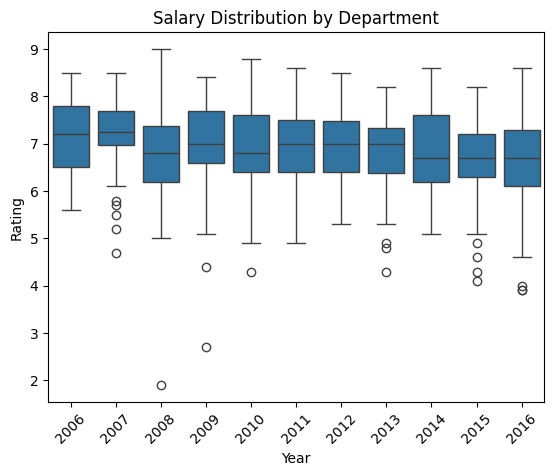

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Year", y="Rating", data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Department")
plt.show()

In [ ]:
sns.violinplot(x="Year", y="Rating", data=df)
plt.title("Salary Distribution by Education Level")
plt.show()

In [ ]:
sns.pairplot(df[["Year", "Rating", "Revenue (Millions)"]])
plt.show()

In [ ]:
sns.kdeplot(df["Year"], shade=True)
plt.title("Salary Density Curve")
plt.show()

In [ ]:
sns.swarmplot(x="Year", y="Rating", data=df)
plt.xticks(rotation=90)
plt.title("Salary Spread by Job Title")
plt.show()

In [ ]:
sns.lineplot(x="Year", y="Rating", data=df)
plt.title("Experience vs Salary Trend")
plt.show()

In [ ]:
import plotly.express as px

fig = px.sunburst(df, path=["Rating", "Runtime (Minutes)"], values="Year")
fig.show()

In [ ]:
from wordcloud import WordCloud

text = " ".join(df["Title"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data for departments and their total salaries
departments = ['HR', 'Marketing', 'Sales', 'IT']
salaries = [55000 + 65000 + 72000, 60000 + 48000 + 58000, 80000 + 90000, 70000 + 95000]

# Creating the Pie chart
plt.pie(salaries, labels=departments, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Salary Distribution by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [ ]:
plt.pie(df["Rating"], labels=df["Year"], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Salary Distribution by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [ ]:
plt.pie(df["Year", labels=df["Rating"]

In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
sns.pairplot(x="Runtime (Minutes)",y="Revenue (Millions)",data=df)

TypeError: pairplot() got an unexpected keyword argument 'x'

In [ ]:
sns.heatmap(df["Rating"].corr(df))

ValueError: could not convert string to float: 'Guardians of the Galaxy'